# Testing BatchNorm in Pytorch

## Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from baseSetterHelper import setAllSeeds, setDeterministic, computeAccu
from trainerHelper import modelTrainer
from plottingHelper import plotTrainingLoss, plotAccuracy, show_examples
from dataLoaderHelper import getDataLoadersMNIST

## Setting Parameters

In [3]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
setAllSeeds(RANDOM_SEED)
setDeterministic()

## Data Imports

In [5]:
trainLoader, validLoader, testLoader = getDataLoadersMNIST(
    batchSize=BATCH_SIZE,
    validFraction=0.1)

# Checking the dataset
for images, labels in trainLoader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

100%|██████████| 9912422/9912422 [00:00<00:00, 113975692.67it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 57931943.48it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 33526067.93it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4035274.05it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


## Class Structure

In [6]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, numFeatures, numClasses, dropProba, numHidden1, numHidden2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(numFeatures, numHidden1, bias=False),
            torch.nn.BatchNorm1d(numHidden1),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # 2nd hidden layer
            torch.nn.Linear(numHidden1, numHidden2, bias=False),
            torch.nn.BatchNorm1d(numHidden2),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # output layer
            torch.nn.Linear(numHidden2, numClasses)
        )

    def forward(self, x):
        logits = self.my_network(x)
        return logits

## Drop Out with Probability 0

In [7]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.0,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [8]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.3559
Epoch:001/050 | Batch:050/210 |  Cost:0.4216
Epoch:001/050 | Batch:100/210 |  Cost:0.3420
Epoch:001/050 | Batch:150/210 |  Cost:0.2311
Epoch:001/050 | Batch:200/210 |  Cost:0.2121
Epoch:001/050 |
Train Acc 95.7143%
Val Acc   96.5500%
Time Taken: 0.30 min
Epoch:002/050 | Batch:000/210 |  Cost:0.1470
Epoch:002/050 | Batch:050/210 |  Cost:0.2062
Epoch:002/050 | Batch:100/210 |  Cost:0.1260
Epoch:002/050 | Batch:150/210 |  Cost:0.1255
Epoch:002/050 | Batch:200/210 |  Cost:0.1484
Epoch:002/050 |
Train Acc 97.4182%
Val Acc   97.3167%
Time Taken: 0.59 min
Epoch:003/050 | Batch:000/210 |  Cost:0.1065
Epoch:003/050 | Batch:050/210 |  Cost:0.0846
Epoch:003/050 | Batch:100/210 |  Cost:0.0887
Epoch:003/050 | Batch:150/210 |  Cost:0.0743
Epoch:003/050 | Batch:200/210 |  Cost:0.1047
Epoch:003/050 |
Train Acc 97.9594%
Val Acc   97.5167%
Time Taken: 0.91 min
Epoch:004/050 | Batch:000/210 |  Cost:0.0679
Epoch:004/050 | Batch:050/210 |  Cost:0.0439
Epoch:004/

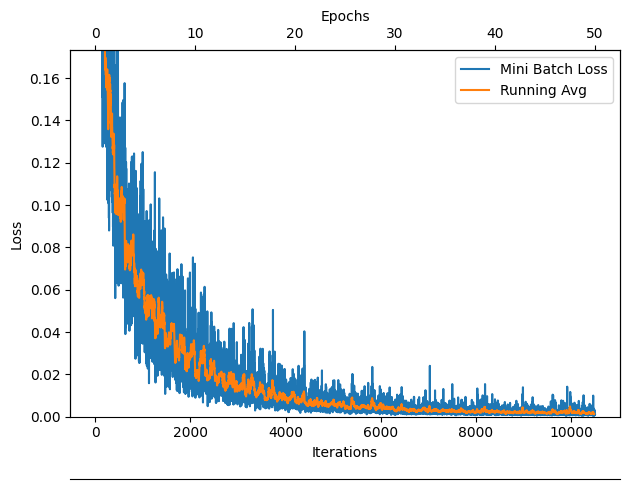

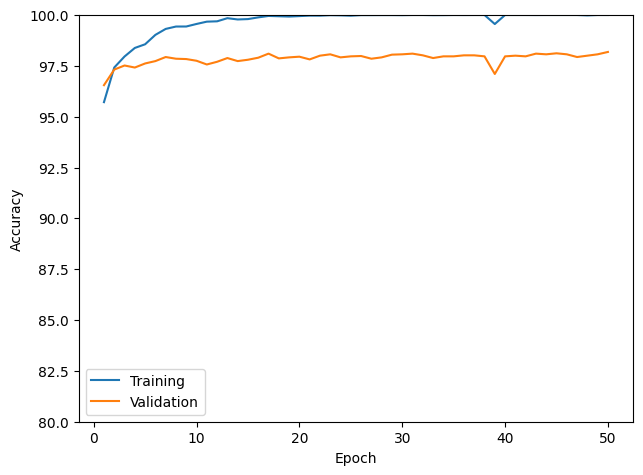

In [9]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## DropOut With Probability 0.5

In [10]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.5,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [11]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.4104
Epoch:001/050 | Batch:050/210 |  Cost:1.0542
Epoch:001/050 | Batch:100/210 |  Cost:0.8618
Epoch:001/050 | Batch:150/210 |  Cost:0.7476
Epoch:001/050 | Batch:200/210 |  Cost:0.6500
Epoch:001/050 |
Train Acc 90.9226%
Val Acc   92.9167%
Time Taken: 0.29 min
Epoch:002/050 | Batch:000/210 |  Cost:0.5814
Epoch:002/050 | Batch:050/210 |  Cost:0.6341
Epoch:002/050 | Batch:100/210 |  Cost:0.7506
Epoch:002/050 | Batch:150/210 |  Cost:0.6936
Epoch:002/050 | Batch:200/210 |  Cost:0.5493
Epoch:002/050 |
Train Acc 92.5298%
Val Acc   93.9000%
Time Taken: 0.57 min
Epoch:003/050 | Batch:000/210 |  Cost:0.3779
Epoch:003/050 | Batch:050/210 |  Cost:0.5400
Epoch:003/050 | Batch:100/210 |  Cost:0.5795
Epoch:003/050 | Batch:150/210 |  Cost:0.4060
Epoch:003/050 | Batch:200/210 |  Cost:0.5850
Epoch:003/050 |
Train Acc 93.6235%
Val Acc   94.7667%
Time Taken: 0.87 min
Epoch:004/050 | Batch:000/210 |  Cost:0.4793
Epoch:004/050 | Batch:050/210 |  Cost:0.3730
Epoch:004/

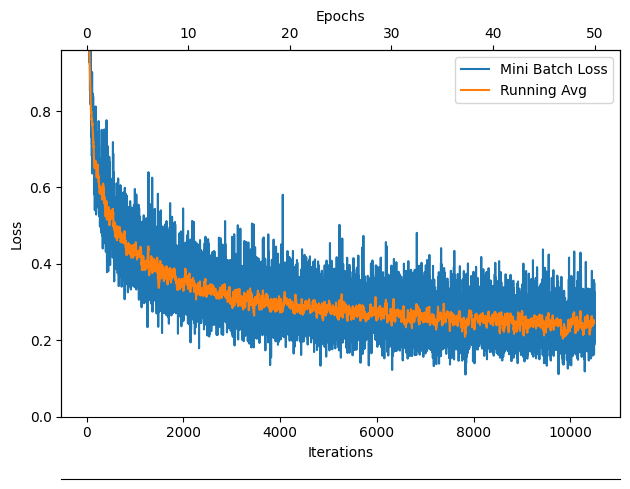

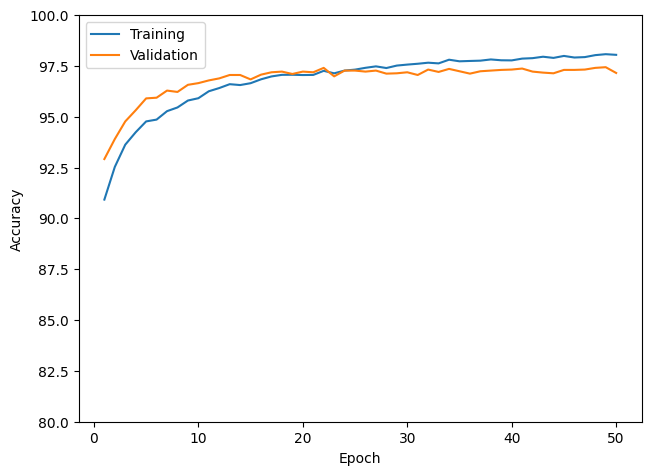

In [12]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()